In [1]:
%matplotlib inline
import pylab as plt

In [2]:
import pandas as pd
import geopandas as gp

## Using "Raw" API by defining URL-request and parsing the response by ourself:
## Geocoding With MAPZEN->OSM service


In [2]:
# Philipp's API KEY. Get your personal one (it is free) if you want to use this extensively
MAPZENAPIKEY = 'mapzen-RBwUDiq' 

In [4]:
# here mapzen - a file in the same folder that contains "geocode" python function
from mapzen import geocode

In [14]:
## return a geojson-like feature collection
result = geocode('Шаболовка 26, Москва, Россия', apikey=MAPZENAPIKEY, sleep_secs=0) 

In [8]:
result['features'][0]

{'geometry': {'coordinates': [37.607423, 55.721069], 'type': 'Point'},
 'properties': {'accuracy': 'point',
  'confidence': 0.673,
  'country': 'Russia',
  'country_a': 'RUS',
  'country_gid': 'whosonfirst:country:85632685',
  'county': 'Donskoj',
  'county_gid': 'whosonfirst:county:1108733405',
  'gid': 'openstreetmap:address:way:261210419',
  'housenumber': '26 с9',
  'id': 'way:261210419',
  'label': '26 с9 улица Шаболовка, Moscow, Russia',
  'layer': 'address',
  'locality': 'Moscow',
  'locality_gid': 'whosonfirst:locality:102003033',
  'name': '26 с9 улица Шаболовка',
  'neighbourhood': 'Luzhniki',
  'neighbourhood_gid': 'whosonfirst:neighbourhood:85903321',
  'region': 'Город Москва',
  'region_gid': 'whosonfirst:region:85688085',
  'source': 'openstreetmap',
  'source_id': 'way:261210419',
  'street': 'улица Шаболовка'},
 'type': 'Feature'}

In [15]:
result['features'][0]['geometry']

{'coordinates': [37.607423, 55.721069], 'type': 'Point'}

In [11]:
result = geocode('522 Lefferts Ave, Brooklyn, New York', apikey=MAPZENAPIKEY, sleep_secs=0)

In [12]:
result['features'][0]

{'geometry': {'coordinates': [-73.9438572, 40.6627823], 'type': 'Point'},
 'properties': {'accuracy': 'point',
  'borough': 'Brooklyn',
  'borough_gid': 'whosonfirst:borough:421205765',
  'confidence': 0.8,
  'country': 'United States',
  'country_a': 'USA',
  'country_gid': 'whosonfirst:country:85633793',
  'county': 'Kings County',
  'county_gid': 'whosonfirst:county:102082361',
  'gid': 'mixed:address:polyline:10550789',
  'housenumber': '522',
  'id': 'polyline:10550789',
  'label': '522 Lefferts Avenue, Brooklyn, New York, NY, USA',
  'layer': 'address',
  'locality': 'New York',
  'locality_gid': 'whosonfirst:locality:85977539',
  'match_type': 'interpolated',
  'name': '522 Lefferts Avenue',
  'neighbourhood': 'East Flatbush',
  'neighbourhood_gid': 'whosonfirst:neighbourhood:85816313',
  'region': 'New York',
  'region_a': 'NY',
  'region_gid': 'whosonfirst:region:85688543',
  'source': 'mixed',
  'street': 'Lefferts Avenue'},
 'type': 'Feature'}

In [13]:
result['features'][0]['geometry']

{'coordinates': [-73.9438572, 40.6627823], 'type': 'Point'}

## Module with connection to the API: OSMNX
More on the module [here](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)

In [3]:
import osmnx as ox

In [8]:
# Don't do that at class, all at once! It will query the whole OSM database 
G = ox.graph_from_place('Moscow, Russia')

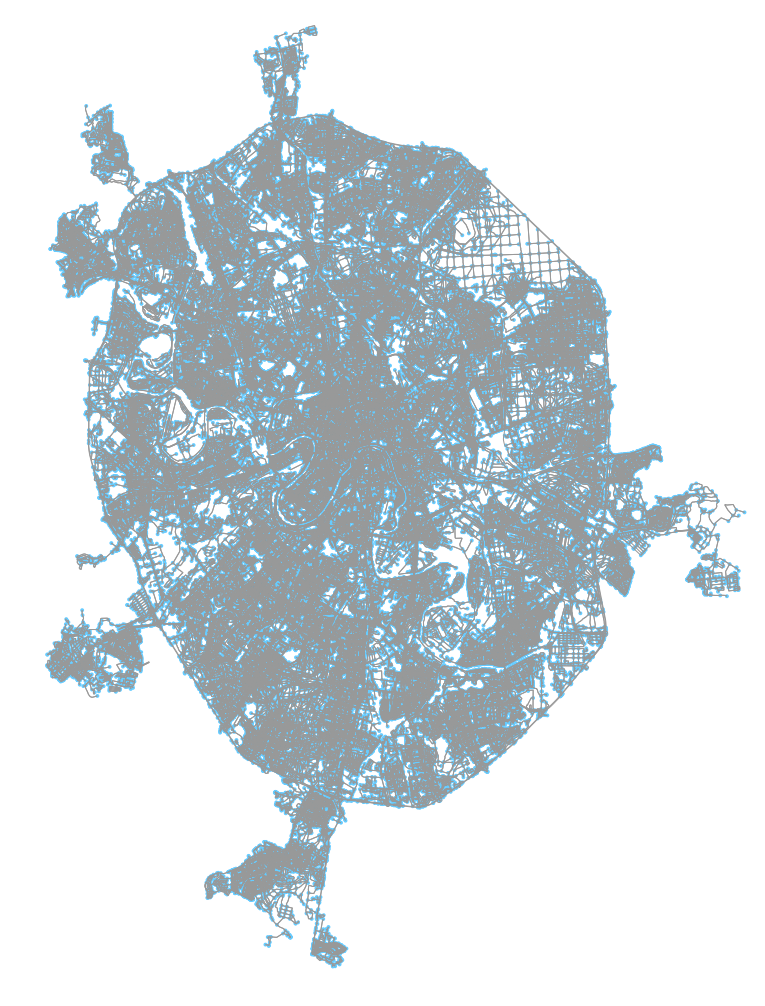

(<matplotlib.figure.Figure at 0x1b8b4d048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a620d208>)

In [10]:
ox.plot_graph(G, fig_height=18,  fig_width=13,  dpi=200)

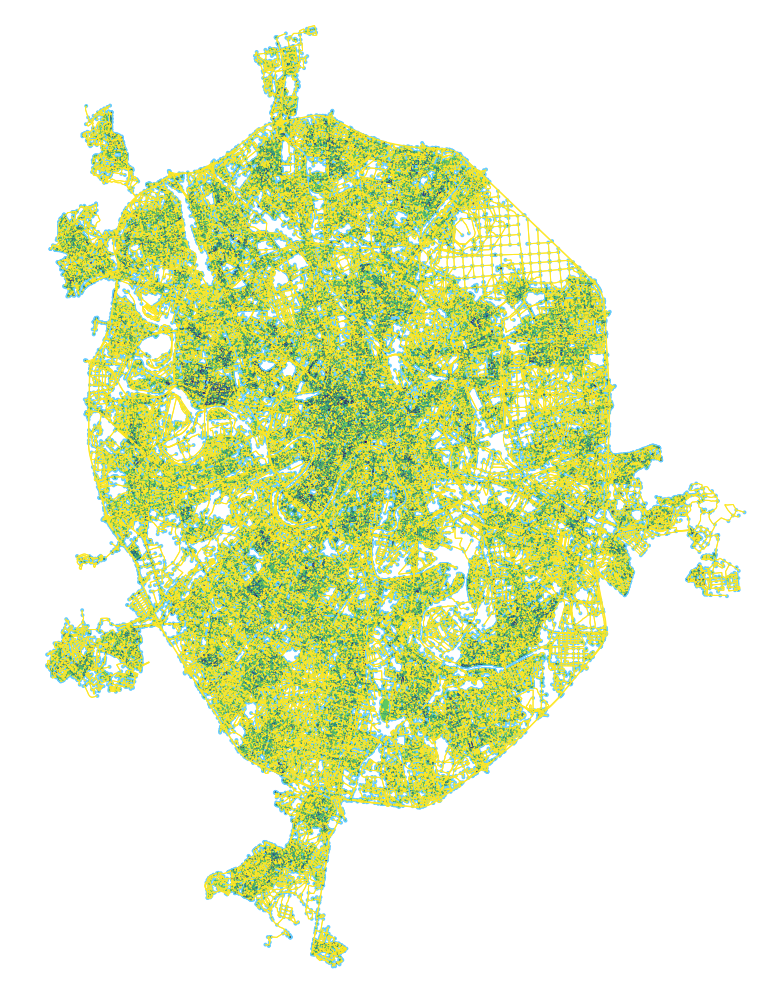

(<matplotlib.figure.Figure at 0x1429dc1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13f363240>)

In [11]:
# measure the lengith of the segments and color them accordingly

ec = ox.get_edge_colors_by_attr(G, attr='length')
ox.plot_graph(G, edge_color=ec, fig_height=18, fig_width=13, dpi=200)

## Store as a shapefile outside of MD repository folder

In [12]:
# actually it's better to create a folder first
ox.save_load.save_graph_shapefile(G, '../../Moscow.shp') 

In [14]:
## Note: You can store network as svg (and open it in the AI)
ox.plot_graph(G, file_format='png',filename='../../Moscow.svg' );

KeyboardInterrupt: 

## Some other cities

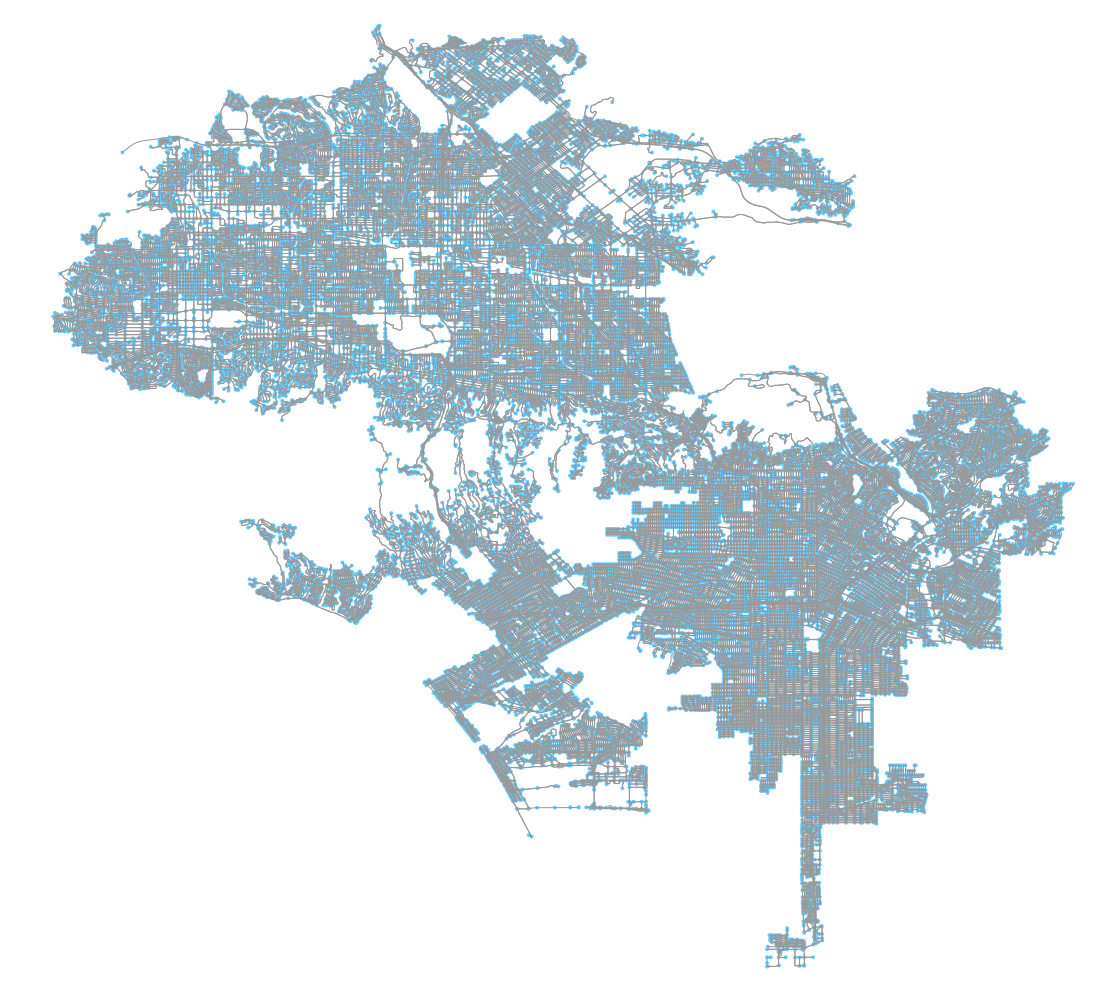

(<matplotlib.figure.Figure at 0x12f5025c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f4fbb38>)

In [4]:
G = ox.graph_from_place('LA, California')
ox.plot_graph(G, fig_height=18) #LA, California